#Libraries and data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/5. Sarimax

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/5. Sarimax


In [4]:
#import libraries
import numpy as np
import pandas as pd

In [5]:
#load the data
df = pd.read_csv("Churrasco.csv",
                 index_col = 'Week',
                 parse_dates = True)
df.head()

,Churrasco,Easter,Carnaval,Republic
Week,,,,
2016-01-31,42,0,0,0
2016-02-07,45,0,1,0
2016-02-14,40,0,0,0
2016-02-21,36,0,0,0
2016-02-28,39,0,0,0


#Preparation

In [6]:
#change index
df = df.asfreq("W")
df.index

DatetimeIndex(['2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06', '2016-03-13', '2016-03-20',
               '2016-03-27', '2016-04-03',
               ...
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24'],
              dtype='datetime64[ns]', name='Week', length=261, freq='W-SUN')

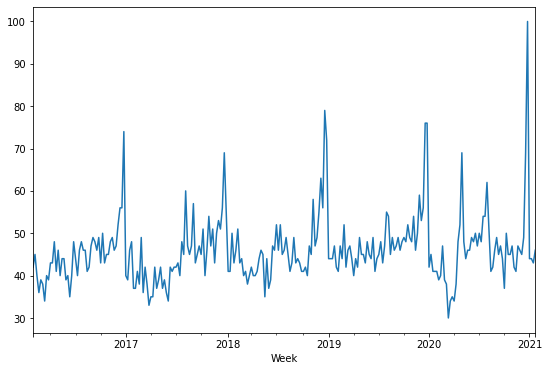

In [7]:
#Viz
df.Churrasco.plot(figsize = (9,6))

In [8]:
#Training and test set
test_weeks = 10
training_set = df.iloc[:-test_weeks, :]
test_set = df.iloc[-test_weeks:, :]
test_set.head()

,Churrasco,Easter,Carnaval,Republic
Week,,,,
2020-11-22,47,0,0,0
2020-11-29,46,0,0,0
2020-12-06,45,0,0,0
2020-12-13,49,0,0,0
2020-12-20,69,0,0,0


#SARIMAX

In [9]:
#Exogenous VAriables
train_exog = training_set.iloc[:, 1:]
test_exog = test_set.iloc[:, 1:]

In [10]:
#SARIMAX
from pmdarima import auto_arima
model = auto_arima(y = training_set.Churrasco,
                   X = train_exog,
                   m = 52,
                   stepwise = True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 52)   Log Likelihood                -775.717
Date:                            Fri, 26 Aug 2022   AIC                           1565.434
Time:                                    19:46:08   BIC                           1590.112
Sample:                                01-31-2016   HQIC                          1575.365
                                     - 11-15-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0578      1.701      7.677      0.000       9.724      16.391
Easter        -1.6323      2.893     -0.564      0.573      -7.302       4.037
Carnaval       5.8951      3.225      1.828      0.068      -0.426      12.216
Republic      11.7524      1.440      8.161      0.000       8.930      14.575
ar.L1          0.4158      0.044      9.549      0.000       0.330       0.501
ar.S.L52       0.5090      0.045     11.401      0.000       0.422       0.597
sigma2        26.9430      2.090     12.890      0.000      22.846      31.040
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                89.19
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.73
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
#Predictions
predictions = pd.Series(model.predict(n_periods= test_weeks,
                        X = test_exog)).rename("SARIMAX")
predictions.index = test_set.index
predictions.head(1)

Week
2020-11-22    40.934447
Freq: W-SUN, Name: SARIMAX, dtype: float64

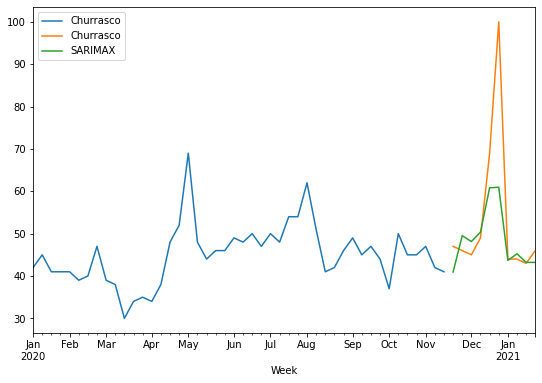

In [12]:
#Plotting
training_set.Churrasco['2020-01-01':].plot(legend = True, 
                                           figsize = (9,6))
test_set.Churrasco.plot(legend = True)
predictions.plot(legend = True)

In [13]:
#MAPE
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set.Churrasco, predictions)

9.129040040383284

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(test_set.Churrasco, predictions))

0.09129040040383284
